<a href="https://colab.research.google.com/github/anishkodadala/Projects-Resume-/blob/main/Pneumonia_disease_detection_using_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5232 images belonging to 2 classes.
Found 623 images belonging to 3 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1401s 8s/step - accuracy: 0.7210 - loss: 0.5911 - val_accuracy: 0.0625 - val_loss: 0.7044
Epoch 2/5
  1/163 ━━━━━━━━━━━━━━━━━━━━ 23:17 9s/step - accuracy: 0.7188 - loss: 0.5754

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7188 - loss: 0.5754 - val_accuracy: 0.1333 - val_loss: -0.1399
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 1352s 8s/step - accuracy: 0.7855 - loss: 0.4373 - val_accuracy: 0.3405 - val_loss: -1.6897
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7812 - loss: 0.4857 - val_accuracy: 0.2667 - val_loss: -1.8811
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 1344s 8s/step - accuracy: 0.7714 - loss: 0.4849 - val_accuracy: 0.0970 - val_loss: 0.1568
20/20 ━━━━━━━━━━━━━━━━━━━━ 132s 7s/step - accuracy: 0.0844 - loss: 0.1309


Test Accuracy: 10.11%


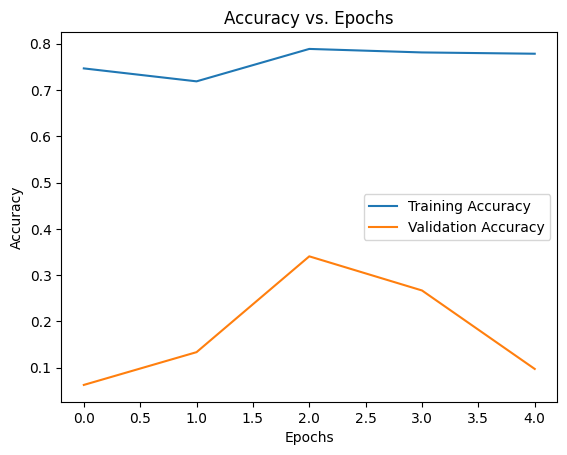

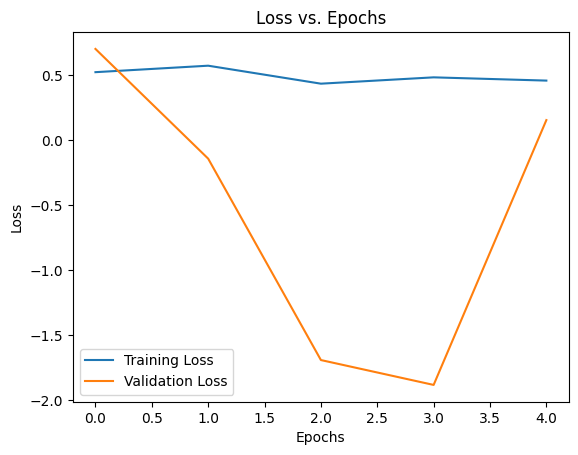

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive  # Google Drive integration

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load the ResNet50 model pre-trained on ImageNet without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers so they are not trained
for layer in base_model.layers:
    layer.trainable = False

# Build the full model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Prepare data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Set up directories for training and testing data
train_dir = '/content/drive/MyDrive/archive (3)/chest_xray/train'  # Replace with your correct path
test_dir = '/content/drive/MyDrive/archive (3)/chest_xray/test'    # Replace with your correct path

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Model Checkpoint to save the best model during training
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/archive (3)/chest_xray/pneumonia_model.keras',  # Use .keras extension
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[checkpoint]
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the trained model explicitly in .h5 format for compatibility
model.save('/content/drive/MyDrive/archive (3)/chest_xray/pneumonia_detection_model.h5')

# Add performance metrics visualization
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


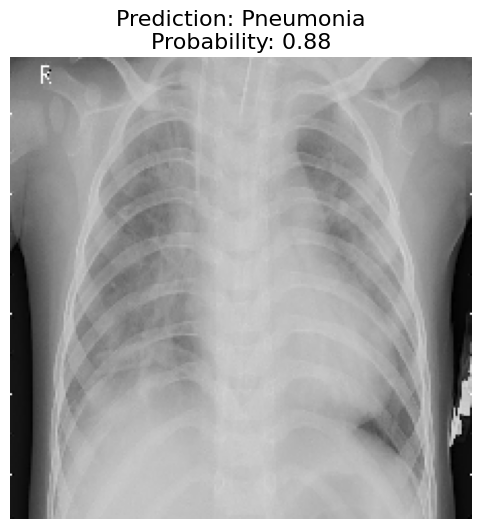

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define a function to predict and visualize a single image
def predict_and_visualize(image_path, model):
    """
    Predict whether an image contains pneumonia or not and display the image with the result.
    Args:
        image_path (str): Path to the image file.
        model: Trained Keras model.
    """
    # Load the image with target size (224, 224)
    img = load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array for prediction
    img_array = img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    # Rescale pixel values to [0, 1]
    img_array_expanded = img_array_expanded / 255.0
    # Predict using the model
    prediction = model.predict(img_array_expanded)
    # Convert prediction to label and probability
    label = 'Pneumonia' if prediction[0][0] > 0.5 else 'Normal'
    probability = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

    # Convert PIL image to a NumPy array for display
    img_np = np.array(img)
    # Display the image with prediction and probability
    plt.figure(figsize=(6, 6))
    plt.imshow(img_np.astype('uint8'))  # Convert to integer type for display
    plt.axis('off')
    plt.title(f"Prediction: {label}\nProbability: {probability:.2f}", fontsize=16)
    plt.show()

# Provide the path to the image you want to predict
image_path = '/content/drive/MyDrive/archive (3)/chest_xray/test/PNEUMONIA/BACTERIA-1135262-0001.jpeg'  # Replace with the actual image path

# Predict and visualize the given image
predict_and_visualize(image_path, model)
